## Decision Trees
In this lecture, we will explore the concept of decision trees, a popular machine learning algorithm used for both classification and regression tasks. Decision trees are valuable for their ease of interpretation and understanding, making them a favored choice in many data-driven decision-making processes.

### Agenda
1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification
4. Decision Tree for Regression
5. Advantages & Limitations of Decision Trees

## 1. Introduction to Decision Trees

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

#### Basic Terminology
1. **Nodes**: Test for the value of a certain attribute.
2. **Edges/ Branch**: Correspond to the outcome of a test and connect to the next node or leaf.
3. **Leaf nodes**: Terminal nodes that predict the outcome (represent class labels or regression values).
4. **Splitting criteria**: Algorithms like Gini Impurity or Entropy are used to decide where to split.


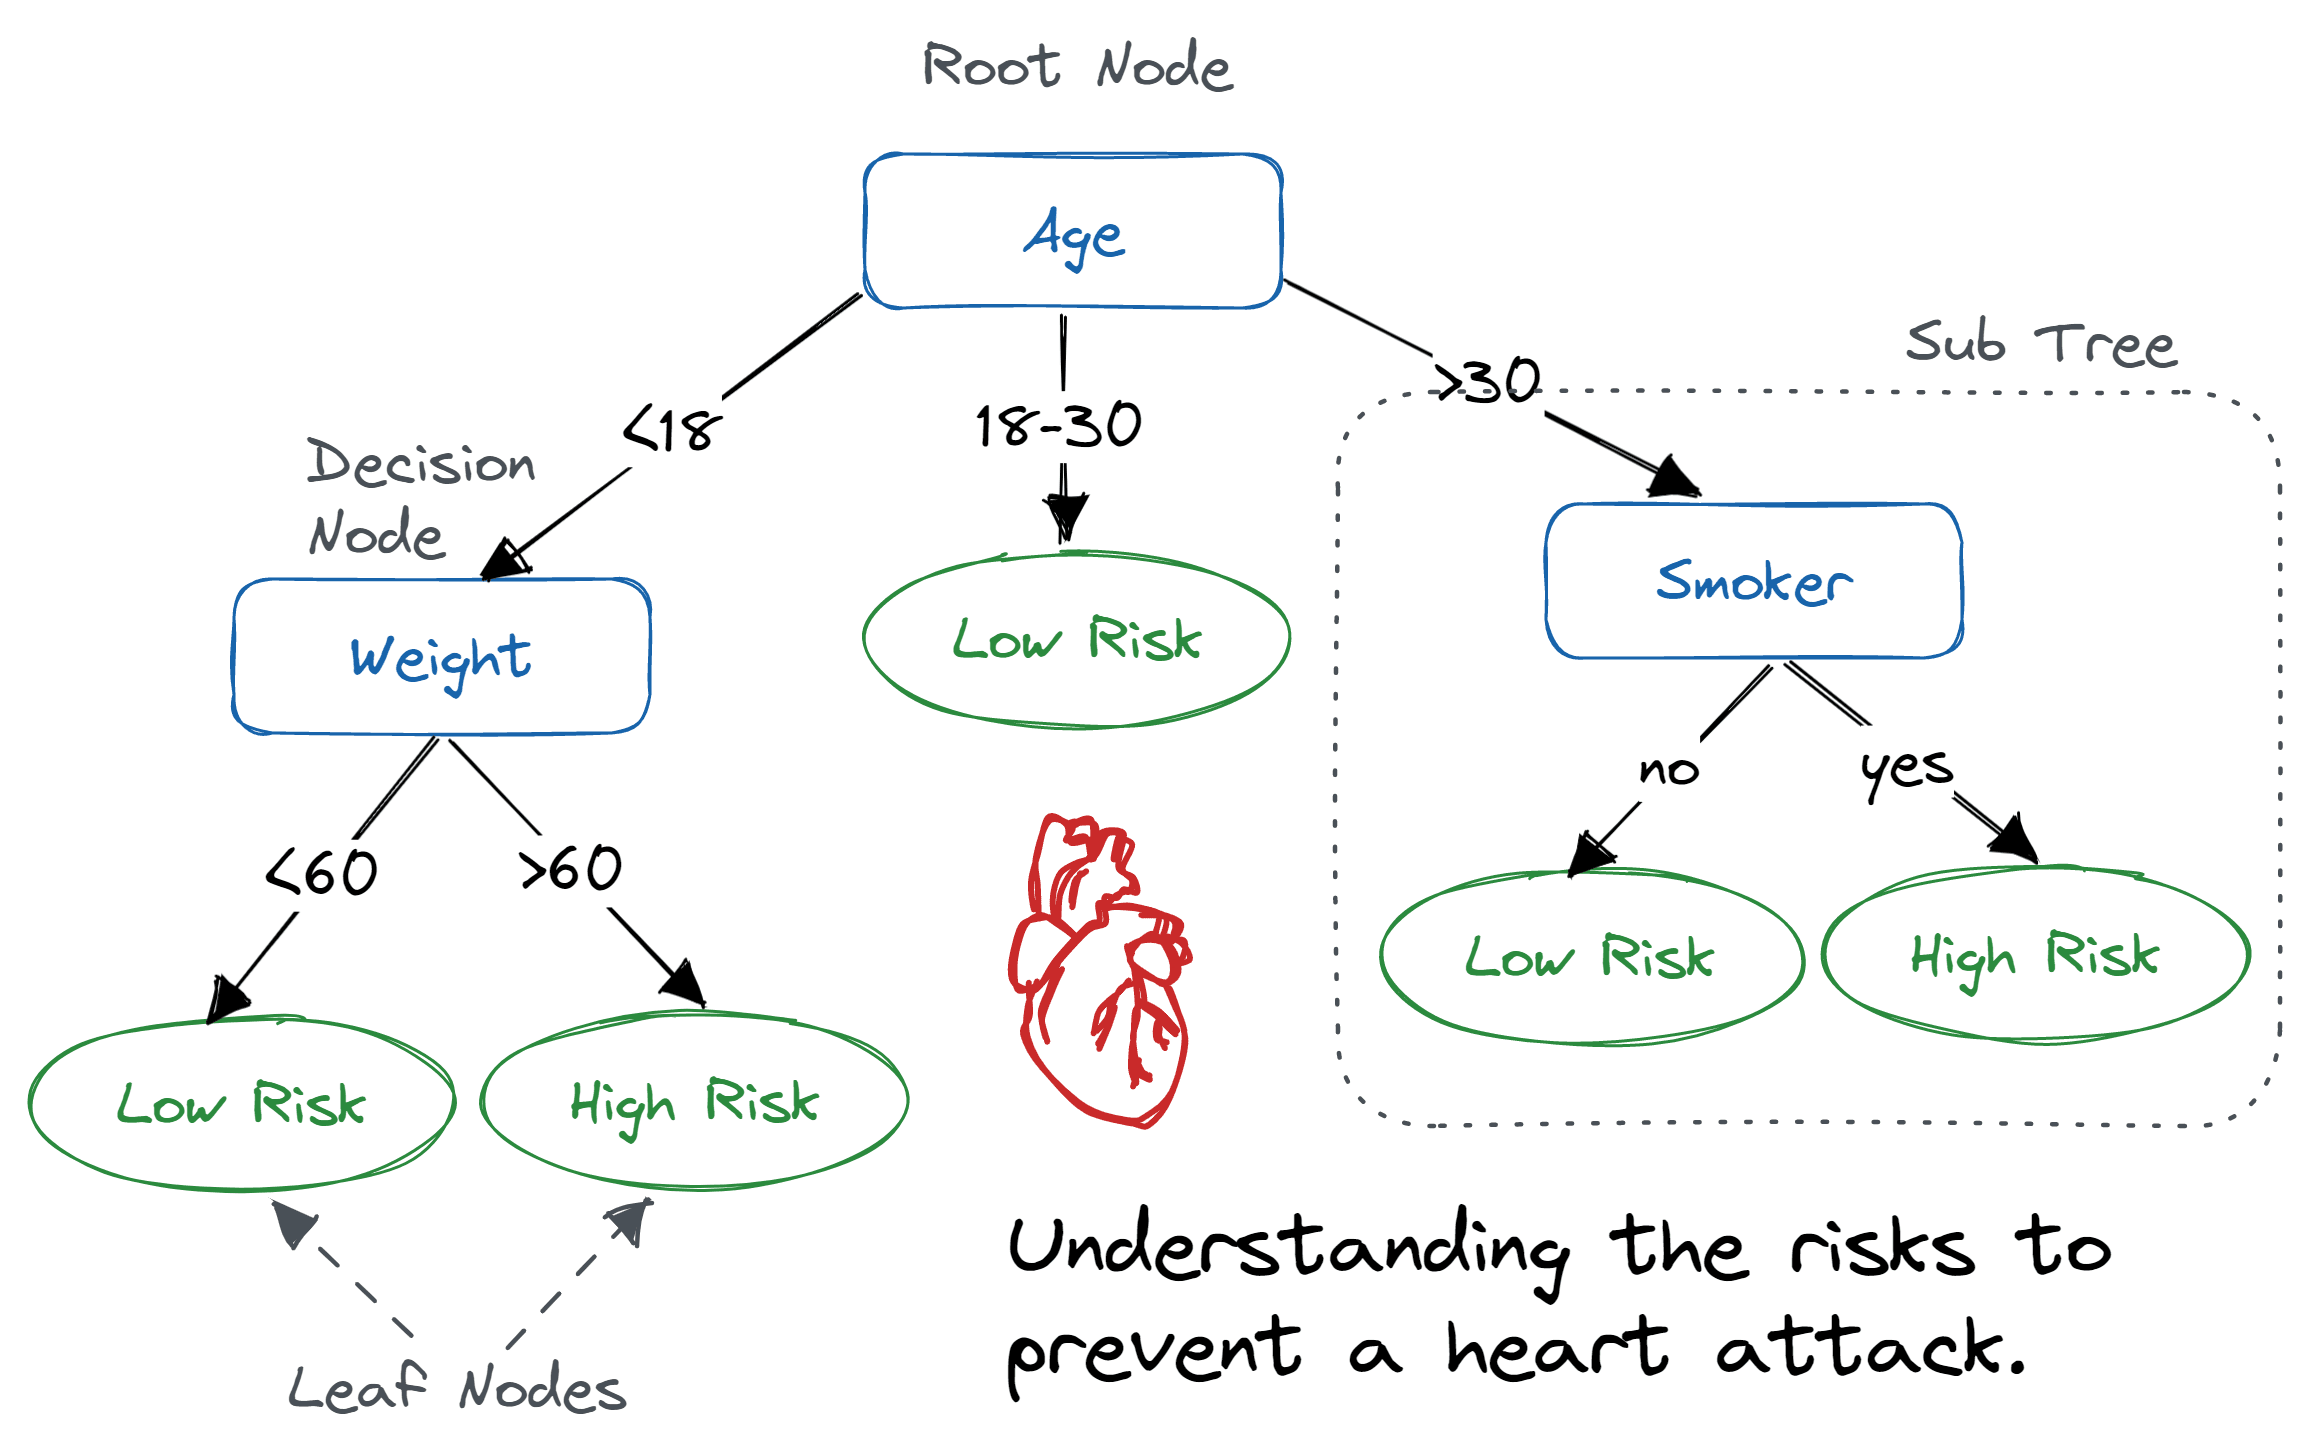

#### Key Points
```
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have fewer & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
play_data = pd.read_csv('tennis.csv.txt')

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

## 2. Decision Tree Algorithm

* Decision Tree is based on CART(Classification and Regression Trees) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

### Criteria for Creating Decision Trees

#### Information Gain

By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

##### Key points
- The information gain is based on the decrease in entropy after a dataset is split on an attribute.
- Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- Entropy(S) = -∑[p(outcome). log2p(outcome)]
- Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
- We intend to choose the attribute, splitting by which information gain will be the most
- Next step is calculating information gain for all attributes

#### Gini index
Another attribute selection measure that *CART (Categorical and Regression Trees)* uses is the *Gini index*. It uses the Gini method to create split points.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1. Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).
2. Calculate Gini for split using weighted Gini score of each node of that split.

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

## Back to our example

### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [6]:
Entropy_Play

0.9402859586706311

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [7]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [8]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [9]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [10]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [11]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0
Entropy_Play_Outlook_Overcast = -(4/4)*np.log2(4/4) #- (0/0)*np.log2(0/0)
Entropy_Play_Outlook_Overcast

-0.0

In [12]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [13]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [14]:
Entropy_Play_Outlook_Rain

0.9709505944546686

#### Gain on splitting by attribute outlook

In [15]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*Entropy_Play_Outlook_Overcast - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [16]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [17]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [18]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [19]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

### Information Gain for humidity

In [20]:
#Entropy for attribute high = 0, also entropy for attribute normal = 0 
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]

In [21]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)
Entropy_Wind_False

0.9182958340544896

In [22]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]

In [23]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

In [24]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [25]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch

In [26]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [27]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [28]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

In [29]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

### Information Gain for Windy

In [30]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [31]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [32]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [33]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [35]:
iris = load_iris()

In [36]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [38]:
dt = DecisionTreeClassifier(criterion='entropy')

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target)

In [41]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(criterion='entropy')

In [42]:
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

In [43]:
dt.predict(testX)

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2])

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

In [44]:
dt.feature_importances_

array([0.02679927, 0.01183516, 0.084049  , 0.87731657])

#### Visualizing Decision Decision Boundry

In [45]:
from sklearn.datasets import make_blobs

In [46]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

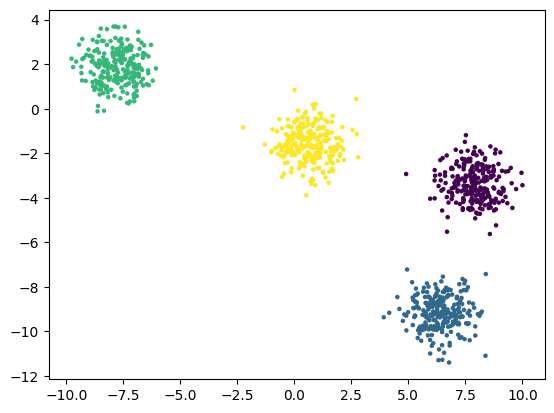

In [47]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X,Y)

DecisionTreeClassifier()

In [50]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [51]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [52]:
xx.shape

(86, 109)

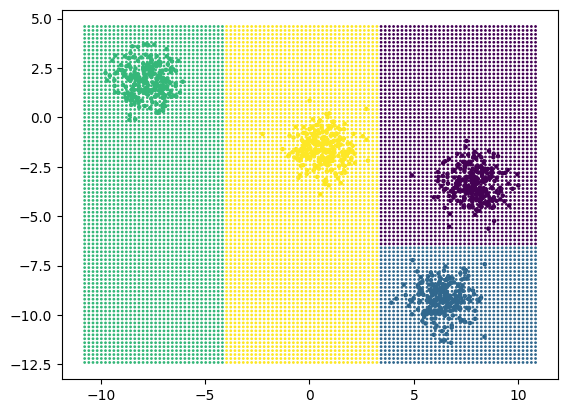

In [53]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### 4. Decision Tree for Regression
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

In [54]:
play_time = pd.read_csv('tennis-time.csv.txt')

In [55]:
play_time

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,36
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,48


In [56]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dt = DecisionTreeRegressor()

In [59]:
dt.fit(play_time.drop('time',axis=1), play_time.time)

DecisionTreeRegressor()

In [60]:
export_graphviz(dt,'regtree.dot',feature_names=['outlook','temp','humidity','windy'])

In [61]:
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt8.PNG?raw=true">

In [62]:
dt.predict([[2,1,1,1]])

/home/dranzer/py3/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([48.])

In [63]:
dt.feature_importances_

array([0.46325729, 0.22244834, 0.14515689, 0.16913749])

### 5. Advantages of Decision Tree
* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both numerical & categorical values
* Supports multi-output 

#### Understanding Multi-Output Problem
* Supervised learning problem with multiple outputs, target is 2D
* If there is no correlation between target, they can be independently calculated using N models ( in case of N targets )
* Since predictors are same, outputs are likely to be correlated.
* Like many other models, decision trees allows for multi-output targets

### 6. Limitations of Decision Tree
* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree
* Imbalanced classes datasets creates biased tree so data needs balancing

##### The above two limitations are handled by ensemble methods

#### Pruning
* A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction
* Two types of pruning - Prepruning & Postpruning
  - Prepruning : Don't allow tree to grow beyond this point
  - Postpruning : Allows tree to grow as much as possible, then prune the tree

![](img/questions-01.png)

# Conceptual Questions 

1. Calculate the self entropy of the following coin with bias :  
  a. p=0.5  
  b. p=0.9  
  c. p=1  
  
2. Calculate the cross entropy of the dice with bias=\[ 0.1, 0.2, 0.1, 0.15, 0.15, 0.3 \] in the following cases  :  
  a. output=1  
  b. output=2  
  c. output=6  
  
3. Tell the cases where you think that cross entropy would be higher for a coin.  
  a. p(H)=0.9, outcome=Head  
  b. p(H)=0.1, outcome=Tail  
  c. p(H)=0.99, outcome=Tail  
  
4. What is Information Gain in terms of Entropy? In case of predicting the number of wickets, what would be information gain on knowledge of weather? 
  
5. What is Gini's Impurity? Why do we use it more often in popular Decision Tree algorithms like CART, rather then entropy? What does the formula signify?
  
6. If the size of feature vector for data point is 5, what will be the depth of the tree?  
  
7. What is the disadvantage of having a tree branched over all the features ? How do we control/prun the growth of tree?  

8. Why is there an aversion in the ML community for using decision tree as a primary choice for building a classifier? 

9. Think about the advantages/Disadvantages of Decision Tree vs Linear Regression.
